## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math
import os

### Read data into DFs

In [2]:
headers = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','pred']

In [3]:
original_train_df = pd.read_csv("census-income.data.csv", low_memory = False, names = headers, index_col = False)

In [4]:
original_test_df = pd.read_csv("census-income.test.csv", low_memory = False, names = headers, index_col = False)

In [5]:
original_train_df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
pred              0
dtype: int64

In [6]:
original_train_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
pred              0
dtype: int64

In [7]:
train_df = original_train_df.copy()

In [8]:
test_df = original_test_df.copy()

In [9]:
train_df[:25]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,pred
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Cleanup:

# To Do's:

**Duplicate Data**
* Check for duplicates

We only found ~34 duplicated values, but they don't even actually appear to be duplicated - only one looks like a duplicate to me.

**Missing Values**
* Find missing values
    * I've found the "?" missing values so far
* Deal with missing values

**Imbalanced Data**
* Deal with imbalanced data

**OneHotEncoding**
* Convert categorical values into a Category datatype using OneHotEncoder
* Analyze charts to find patterns

In [10]:
train_df['pred'].value_counts()

pred
<=50K    24720
>50K      7841
Name: count, dtype: int64

### Remove whitespace

In [11]:
# show example value

train_df.iloc[0]['occupation']

' Adm-clerical'

In [12]:
def data_to_str(df):

# Iterate through dataframe, test datatype, append string-type columns into our list,
# use list to strip whitespace from string values in columns
    
    to_string_list = [] # create empty list to fill with string-dtype column names
    
    for col in df: # iterate through all columns in train_df
        if pd.api.types.is_object_dtype(df[col]): # test if string-datatype
            to_string_list.append(col) # if true, append to list
    
    for col in to_string_list: # iterate through list of string-datatype columns
        df[col] = df[col].str.strip() # strip all values in column of whitespace

In [13]:
data_to_str(train_df)

In [14]:
# test example value

train_df.iloc[0]['occupation']

'Adm-clerical'

### Explicitly declare int32 datatype

In [15]:
# The integers are stored in int64 - not wrong, but unnecessarily large for these values

train_df.iloc[0]['age']

np.int64(39)

In [16]:
def data_to_int32(df):

# Iterate through dataframe, test datatype, append numeric-type columns into our list,
# use list to strip whitespace from numeric values in columns

    to_int32_list = [] # create empty list to fill with numeric-dtype column names
    
    for col in df: # iterate through all columns in train_df
        if pd.api.types.is_numeric_dtype(df[col]): # test if string-datatype
            to_int32_list.append(col) # if true, append to list
    
    for col in to_int32_list: # iterate through list of string-datatype columns
        df[col] = df[col].astype('int32') # strip all values in column of whitespace

In [17]:
data_to_int32(train_df)

In [18]:
train_df.iloc[0]['age']

np.int32(39)

In [19]:
train_df.dtypes

age                int32
workclass         object
fnlwgt             int32
education         object
education-num      int32
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int32
capital-loss       int32
hours-per-week     int32
native-country    object
pred              object
dtype: object

In [20]:
train_df.replace("?", pd.NA, inplace=True)

In [21]:
train_df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
pred                 0
dtype: int64

In [22]:
train_df[train_df.isna().any(axis=1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,pred
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,<NA>,>50K
27,54,<NA>,180211,Some-college,10,Married-civ-spouse,<NA>,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,<NA>,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,<NA>,<=50K
61,32,<NA>,293936,7th-8th,4,Married-spouse-absent,<NA>,Not-in-family,White,Male,0,0,40,<NA>,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,<NA>,320084,Bachelors,13,Married-civ-spouse,<NA>,Wife,White,Female,0,0,55,United-States,>50K
32531,30,<NA>,33811,Bachelors,13,Never-married,<NA>,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,<NA>,287372,Doctorate,16,Married-civ-spouse,<NA>,Husband,White,Male,0,0,10,United-States,>50K
32541,41,<NA>,202822,HS-grad,9,Separated,<NA>,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [23]:
train_df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', <NA>, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [24]:
train_df['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [25]:
train_df['native-country'].value_counts(dropna=False)

native-country
United-States                 29170
Mexico                          643
<NA>                            583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [26]:
train_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,pred
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [27]:
duplicates = train_df.duplicated()
train_df[duplicates].sort_values('fnlwgt')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,pred
28846,39,Private,30916,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
21875,49,Private,31267,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
22494,49,Self-emp-not-inc,43479,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
30845,46,Private,133616,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,<NA>,<=50K
21490,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K


In [28]:
bar_charts = ['sex','race','workclass','marital-status','occupation','relationship','education','education-num','native-country']

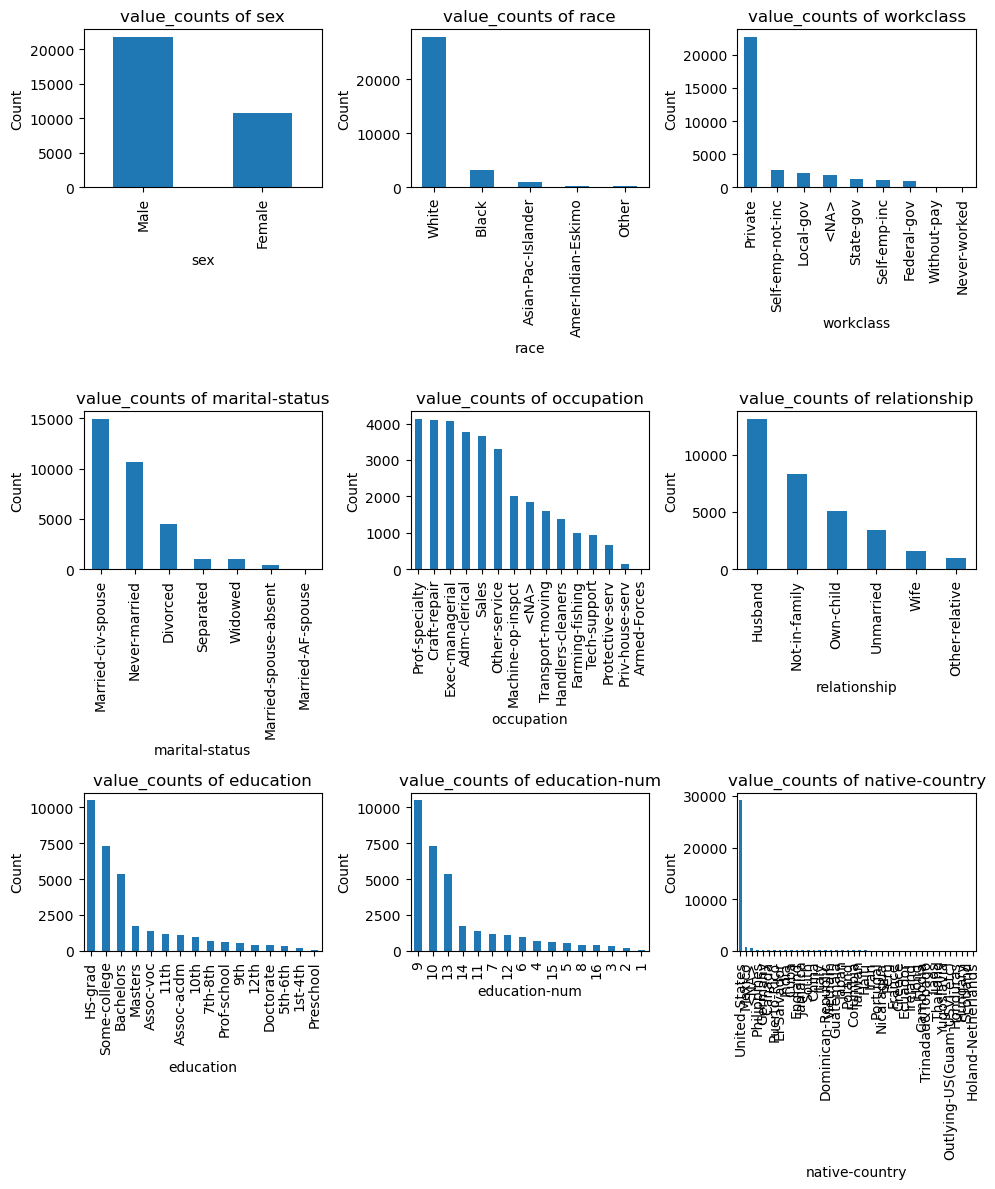

In [29]:
# Number of columns & rows
cols = 3
rows = 3

fig, axes = plt.subplots(rows, cols, figsize=(10, 4 * rows))

axes = axes.flatten()   # flatten array of axes for easy indexing

for i, column in enumerate(bar_charts):
    train_df[column].value_counts(dropna=False).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"value_counts of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [30]:
hist_charts = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

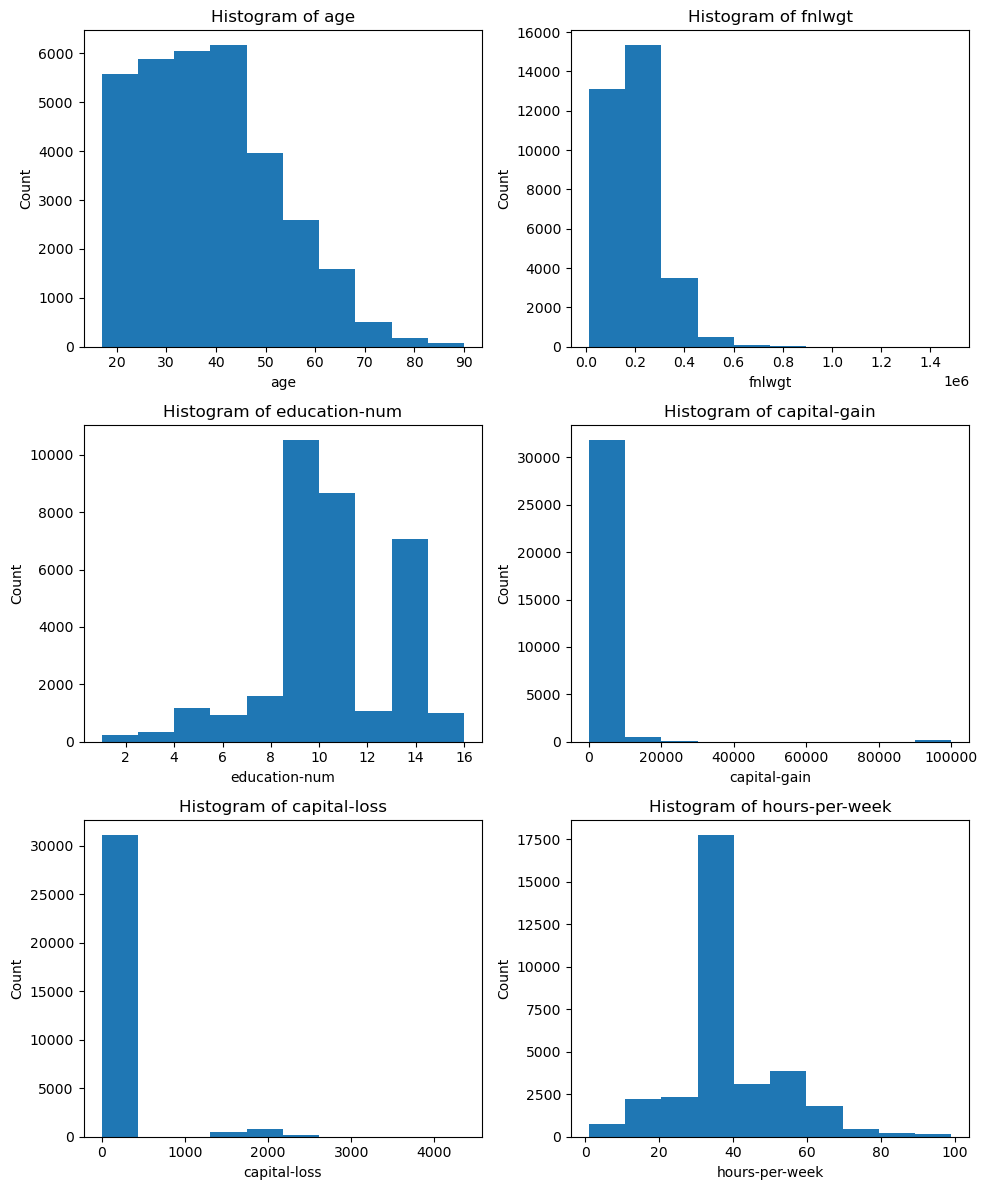

In [31]:
# Number of columns & rows
cols = 2
rows = 3

fig, axes = plt.subplots(rows, cols, figsize=(10, 4 * rows))

axes = axes.flatten()   # flatten array of axes for easy indexing

for i, column in enumerate(hist_charts):
    train_df[column].plot(kind='hist', ax=axes[i])
    axes[i].set_title(f"Histogram of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int32 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int32 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int32 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int32 
 11  capital-loss    32561 non-null  int32 
 12  hours-per-week  32561 non-null  int32 
 13  native-country  31978 non-null  object
 14  pred            32561 non-null  object
dtypes: int32(6), object(9)
memory usage: 3.0+ MB


In [33]:
train_df.drop('pred', axis=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [34]:
'''
corr_matrix = train_df.drop('pred', axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig, ax = plt.subplots()
heatmap = sns.heatmap(corr_matrix, cmap='RdBu', linewidths=1, fmt=".1%", annot_kws={"color": "darkgrey", "size": 12}, mask=mask)
plt.figure(figsize=(15,15))
ax.set_title('Correlation Matrix')
plt.show()
'''

'\ncorr_matrix = train_df.drop(\'pred\', axis=1).corr()\nmask = np.triu(np.ones_like(corr_matrix, dtype=bool))\nfig, ax = plt.subplots()\nheatmap = sns.heatmap(corr_matrix, cmap=\'RdBu\', linewidths=1, fmt=".1%", annot_kws={"color": "darkgrey", "size": 12}, mask=mask)\nplt.figure(figsize=(15,15))\nax.set_title(\'Correlation Matrix\')\nplt.show()\n'

In [35]:
train_df.value_counts(['race','sex'])

race                sex   
White               Male      19174
                    Female     8642
Black               Male       1569
                    Female     1555
Asian-Pac-Islander  Male        693
                    Female      346
Amer-Indian-Eskimo  Male        192
Other               Male        162
Amer-Indian-Eskimo  Female      119
Other               Female      109
Name: count, dtype: int64

In [36]:
train_df.value_counts(['occupation'])

occupation       
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

## Missing Values (H2)

In [37]:
train_df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
pred                 0
dtype: int64

In [38]:
columns = {'workclass', 'occupation', 'native-country'}

In [39]:
#Print only the columns that contain NA values
for col in columns:
    if train_df[col].isna().any():
        print(f"\n{col}")
        print(train_df[col].unique())


occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' <NA>
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' <NA>
 'Self-emp-inc' 'Without-pay' 'Never-worked']

native-country
['United-States' 'Cuba' 'Jamaica' 'India' <NA> 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


In [40]:
#Delete Rows with Missing Values (NA) -1 
df_deleted=train_df.dropna()

In [41]:
#Unique values with no NA
for col in columns:     
    print(f"\n {col}")
    print(df_deleted[col].unique())


 occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']

 workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']

 native-country
['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Poland'
 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan' 'Haiti'
 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France' 'Guatemala'
 'Italy' 'China' 'South' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


In [42]:
print(len(train_df))
print(len(df_deleted))
print(len(train_df)-len(df_deleted)) #Number of deleted rows

32561
30162
2399


In [43]:
#Imputation: mode - 1
df_mode = train_df.copy()

for col in columns:
    df_mode[col] = df_mode[col].fillna(df_mode[col].mode()[0])

In [44]:
#Imputation: New category ("Unknown") - 2
df_unknown = train_df.copy()

for col in columns:
    df_unknown[col] = df_unknown[col].fillna("Unknown")



In [45]:
#Imputation: Random sampling -3 
df_random = train_df.copy()

for col in columns:
    missing_idx = df_random[col].isna()
    n_missing = missing_idx.sum()
    
    if n_missing > 0:
        sampled_values = df_random[col].dropna().sample(
            n_missing, replace=True, random_state=42
        ).values
        
        df_random.loc[missing_idx, col] = sampled_values

In [46]:
#Imputation: Predictive Modeling 4 - (1)
#Replace missing values in the input features with a new category called "Unknown".

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

target_cols = ["workclass", "occupation", "native-country"]

df_imputed = train_df.copy()
df_imputed = df_imputed.replace({pd.NA: np.nan})

for target_col in target_cols:
    
    train_df2 = df_imputed[df_imputed[target_col].notna()]
    test_df2  = df_imputed[df_imputed[target_col].isna()]

    X = train_df2.drop(columns=[target_col])
    y = train_df2[target_col]


    X_train_eval, X_val, y_train_eval, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    X_test = test_df2.drop(columns=[target_col])

    cat_cols = X.select_dtypes(include='object').columns
    num_cols = X.select_dtypes(exclude='object').columns

    preprocess = ColumnTransformer([
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
            ("encoder", OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols),
        ("num", SimpleImputer(strategy="median"), num_cols)
    ])
    
    model = Pipeline([
        ("preprocess", preprocess),
        ("clf", RandomForestClassifier())
    ])

    model.fit(X_train_eval, y_train_eval)

    val_preds = model.predict(X_val)
    acc = accuracy_score(y_val, val_preds)
    print(f"[{target_col}] Accuracy: {acc:.4f}")

    model.fit(X, y)

    preds = model.predict(X_test)
    df_imputed.loc[df_imputed[target_col].isna(), target_col] = preds


[workclass] Accuracy: 0.7308
[occupation] Accuracy: 0.2897
[native-country] Accuracy: 0.9225


In [47]:
#Imputation: Predictive Modeling 4 - (2) 
#Replace missing values in the input features with the most frequent category (mode).

df_imputed = train_df.copy()
df_imputed = df_imputed.replace({pd.NA: np.nan})

for target_col in target_cols:
    
    train_df2 = df_imputed[df_imputed[target_col].notna()]
    test_df2  = df_imputed[df_imputed[target_col].isna()]

    X = train_df2.drop(columns=[target_col])
    y = train_df2[target_col]


    X_train_eval, X_val, y_train_eval, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    X_test = test_df2.drop(columns=[target_col])

    #Separate categorical and numerical columns
    cat_cols = X.select_dtypes(include='object').columns
    num_cols = X.select_dtypes(exclude='object').columns

    preprocess = ColumnTransformer([
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols),

    ("num", "passthrough", num_cols)
    ])

    
    model = Pipeline([
        ("preprocess", preprocess),
        ("clf", RandomForestClassifier())
    ])

    model.fit(X_train_eval, y_train_eval)

    val_preds = model.predict(X_val)
    acc = accuracy_score(y_val, val_preds)
    print(f"[{target_col}] Accuracy: {acc:.4f}")

    model.fit(X, y)

    preds = model.predict(X_test)
    df_imputed.loc[df_imputed[target_col].isna(), target_col] = preds


[workclass] Accuracy: 0.7273
[occupation] Accuracy: 0.2899
[native-country] Accuracy: 0.9229


There are many ways like row deletion and random sampling  
but I used the two most common approaches: introducing a new category and imputing with the mode.

## Normalization

capital-gain and capital-loss variables are extremely right-skewed with heavy zeros and a few large outliers.
Standard normalization (like Min–Max or Z-score) directly will not produce meaningful scaling

In [50]:
#Log transformation (best for heavy right-skew)
train_df['capital_gain_log'] = np.log1p(train_df['capital-gain'])
train_df['capital_loss_log'] = np.log1p(train_df['capital-loss'])

log1p(x) handles zeros safely.  
Compresses extreme values.  
Spreads out dense low-value regions.

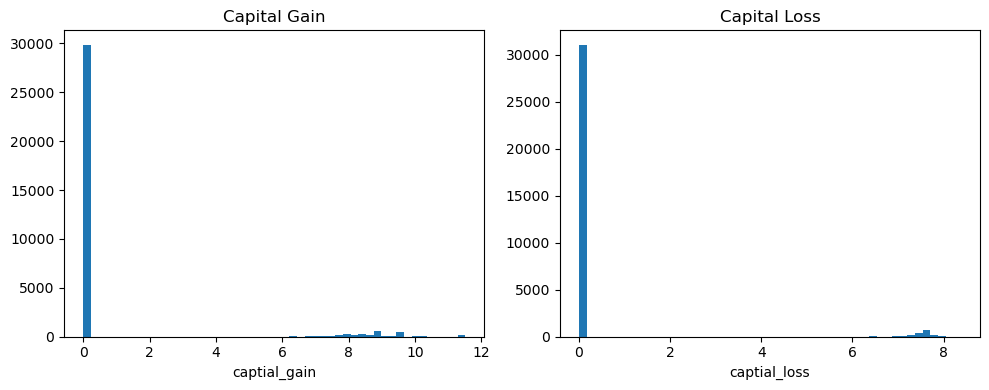

In [64]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.hist(train_df['capital_gain_log'], bins=50)
plt.title("Capital Gain")
plt.xlabel("captial_gain")

plt.subplot(1, 2, 2)
plt.hist(train_df['capital_loss_log'], bins=50)
plt.title("Capital Loss")
plt.xlabel("captial_loss")

plt.tight_layout()
plt.show()

In [55]:
#Binning

#capital_gain
gain_bins = [-1, 0, 5000, 15000, 30000, np.inf]
gain_labels = [
    'no_gain', #0
    'low_gain', # 0 to 5000
    'medium_gain', 
    'high_gain', 
    'very_high_gain'
]

train_df['capital_gain_bin'] = pd.cut(train_df['capital-gain'], 
                                bins=gain_bins, 
                                labels=gain_labels)


#capital_loss
loss_bins = [-1, 0, 1000, 2000, np.inf]
loss_labels = [
    'no_loss', #0
    'low_loss', #0 to 5000
    'medium_loss',
    'high_loss'
]

train_df['capital_loss_bin'] = pd.cut(train_df['capital-loss'],
                                bins=loss_bins,
                                labels=loss_labels)

print(train_df['capital_gain_bin'].value_counts(), "\n\n")

print(train_df['capital_loss_bin'].value_counts())

capital_gain_bin
no_gain           29849
low_gain           1064
medium_gain        1035
high_gain           447
very_high_gain      166
Name: count, dtype: int64 


capital_loss_bin
no_loss        31042
medium_loss     1158
high_loss        325
low_loss          36
Name: count, dtype: int64


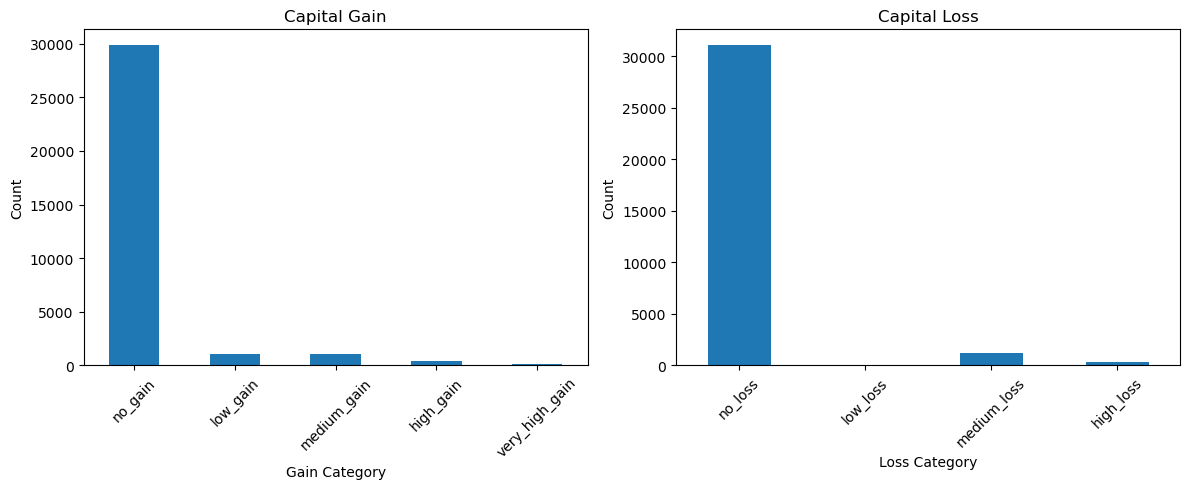

In [63]:
plt.figure(figsize=(12,5))

#capital gain
plt.subplot(1, 2, 1)
train_df['capital_gain_bin'].value_counts().sort_index().plot(kind='bar')
plt.title("Capital Gain")
plt.xlabel("Gain Category")
plt.ylabel("Count")
plt.xticks(rotation=45)

#capital loss
plt.subplot(1, 2, 2)
train_df['capital_loss_bin'].value_counts().sort_index().plot(kind='bar')
plt.title("Capital Loss")
plt.xlabel("Loss Category")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [56]:
#Binary Indicators
#Because almost all values are zero
#all zero values - 0
#any positive value - 1


train_df['has_capital_gain'] = (train_df['capital-gain'] > 0).astype(int)
train_df['has_capital_loss'] = (train_df['capital-loss'] > 0).astype(int)


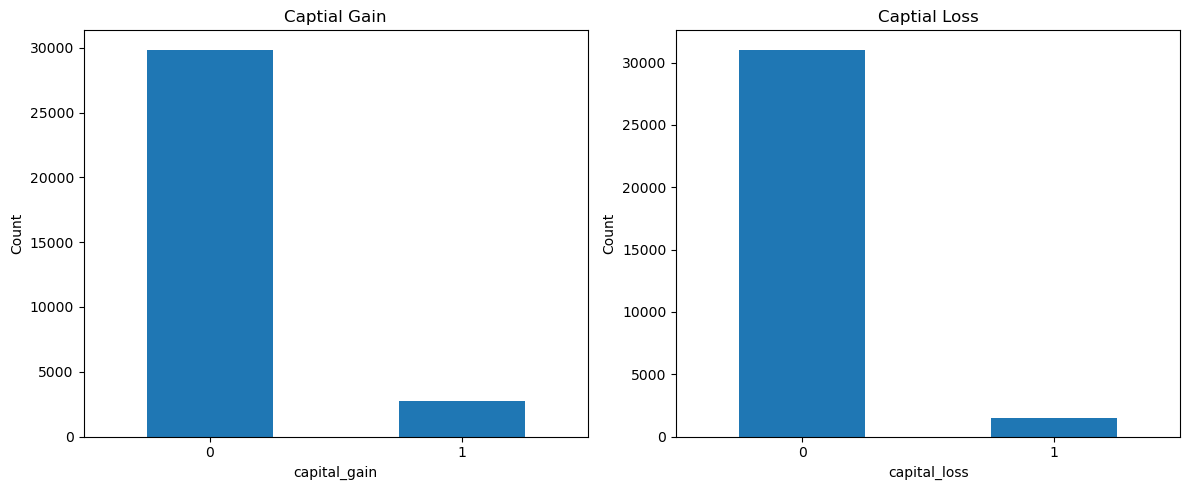

In [62]:
plt.figure(figsize=(12,5))

#capital_gain
plt.subplot(1, 2, 1)
train_df['has_capital_gain'].value_counts().sort_index().plot(kind='bar')
plt.title("Captial Gain")
plt.xlabel("capital_gain")
plt.ylabel("Count")
plt.xticks(rotation=0)

#capital_loss
plt.subplot(1, 2, 2)
train_df['has_capital_loss'].value_counts().sort_index().plot(kind='bar')
plt.title("Captial Loss")
plt.xlabel("capital_loss")
plt.ylabel("Count")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()
